In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression


In [2]:
np.random.seed(42)

In [3]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
datapath = Path("data/lifesat") 
# wczytujemy zbiory
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [5]:
display(gdp_per_capita)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [6]:
gdp_per_capita.columns
gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita["Year"]==2020]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(
    columns={"GDP per capita, PPP (constant 2017 international $)": "GDP per capita"}
)
gdp_per_capita_2020

,Entity,Code,Year,GDP per capita
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [7]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [8]:
oecd_bli = oecd_bli.reset_index()
oecd_bli


Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
7,Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
8,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
9,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7


In [9]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            41 non-null     object 
 1   Air pollution                                      41 non-null     float64
 2   Dwellings without basic facilities                 38 non-null     float64
 3   Educational attainment                             40 non-null     float64
 4   Employees working very long hours                  39 non-null     float64
 5   Employment rate                                    41 non-null     float64
 6   Feeling safe walking alone at night                41 non-null     float64
 7   Homicide rate                                      41 non-null     float64
 8   Household net adjusted disposable income           30 non-null     float64
 9   Household ne

In [10]:
full_country_stats = oecd_bli.merge(gdp_per_capita_2020, left_on="Country", right_on="Entity", how="inner")
full_country_stats

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Entity,Code,Year,GDP per capita
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,2.7,502.0,14.35,91.0,93.0,21.0,Australia,AUS,2020,48697.837028
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,1.3,492.0,14.55,80.0,92.0,17.0,Austria,AUT,2020,51935.603862
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,2.0,503.0,15.70,89.0,84.0,19.3,Belgium,BEL,2020,48210.033111
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,2.2,395.0,NaN,79.0,73.0,16.2,Brazil,BRA,2020,14063.982505
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,2.9,523.0,14.56,68.0,91.0,17.3,Canada,CAN,2020,45856.625626
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,1.3,443.0,NaN,47.0,71.0,17.5,Chile,CHL,2020,23324.524751
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,1.4,410.0,NaN,53.0,75.0,14.1,Colombia,COL,2020,13441.492952
7,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,2.0,504.0,15.87,86.0,95.0,19.5,Denmark,DNK,2020,55938.212809
8,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,2.7,524.0,14.90,64.0,84.0,17.7,Estonia,EST,2020,35638.421351
9,Finland,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,...,2.2,523.0,15.17,67.0,95.0,19.8,Finland,FIN,2020,47260.800458


In [11]:
full_country_stats = full_country_stats[["Country", "Life satisfaction", "GDP per capita"]]
# full_country_stats = full_country_stats.sort_values(by="GDP per capita")
full_country_stats
# full_country_stats.to_csv(datapath / "lifesat_full.csv", index=False)

,Country,Life satisfaction,GDP per capita
0,Australia,7.3,48697.837028
1,Austria,7.1,51935.603862
2,Belgium,6.9,48210.033111
3,Brazil,6.4,14063.982505
4,Canada,7.4,45856.625626
5,Chile,6.5,23324.524751
6,Colombia,6.3,13441.492952
7,Denmark,7.6,55938.212809
8,Estonia,5.7,35638.421351
9,Finland,7.6,47260.800458


In [12]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats["GDP per capita"] >= min_gdp) & 
                                    (full_country_stats["GDP per capita"] <= max_gdp)]
country_stats.to_csv(datapath / "lifesat.csv", index=False)

In [13]:
lifesat = pd.read_csv("./data/lifesat/lifesat.csv")



In [14]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            27 non-null     object 
 1   Life satisfaction  27 non-null     float64
 2   GDP per capita     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


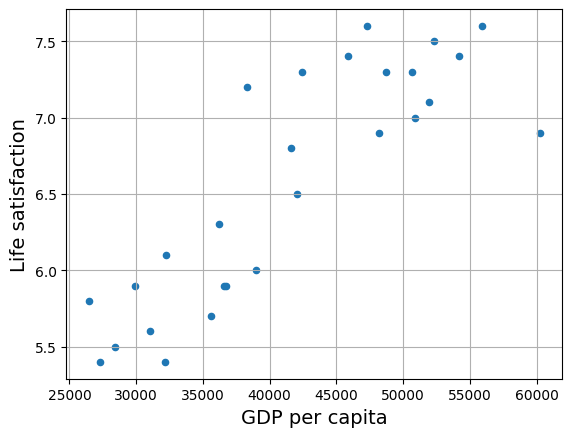

In [15]:
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita", y='Life satisfaction')
plt.show()

In [21]:
X = lifesat[["GDP per capita"]]
y = lifesat[["Life satisfaction"]]

model = LinearRegression()

model.fit(X,y)

theta_0=model.intercept_[0]
theta_1=model.coef_[0][0]
print(f"theta_0: {theta_0}")
print(f"theta_1: {theta_1}")

theta_0: 3.749049427376912
theta_1: 6.778899694341219e-05


In [22]:
model.fit(X,y)

LinearRegression()

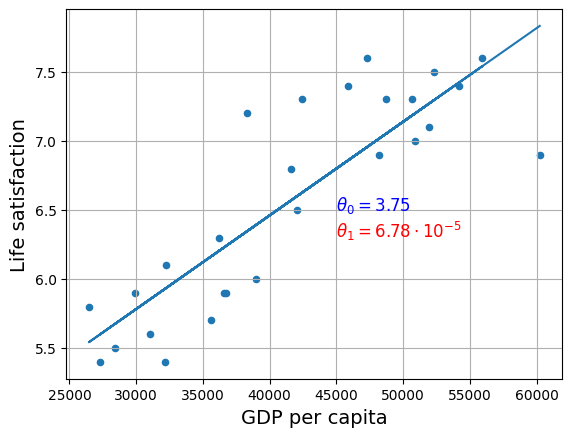

In [17]:
lifesat.plot(kind='scatter', grid=True,
x="GDP per capita", y='Life satisfaction')
plt.plot(X, theta_0+theta_1*X)
plt.text(45000, 6.5, fr"$\theta_0 = {theta_0.round(2)}$", color="blue")
plt.text(45000, 6.3, fr"$\theta_1 = {theta_1 * 1e5:.2f}\cdot10^{{-5}}$", color="red")
#czegos brakuje
plt.show()

In [18]:
cyprus_gdp_per_capita_2020 = (
    gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"][["GDP per capita"]]
)
print(cyprus_gdp_per_capita_2020)

      GDP per capita
1517    37655.180346


In [19]:
cyprus_predocted_life_satisfaction = model.predict(cyprus_gdp_per_capita_2020)
print(cyprus_predocted_life_satisfaction)

[[6.30165633]]


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression

from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)

model_knn.fit(X,y)

model_knn.predict(cyprus_gdp_per_capita_2020)


array([[6.33333333]])